In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Read in csv files and merge
athletes_df = pd.read_csv('data_files/athlete_events.csv')
regions_df = pd.read_csv('data_files/noc_regions.csv')
data = pd.merge(athletes_df, regions_df, how='left', on='NOC')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [2]:
# Determine which columns have null values 
athletes_df.isna().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
dtype: bool

In [3]:
# Cleaning up DataFrame
data.drop(['Team', 'NOC', 'Games', 'City', 'notes'], axis=1, inplace=True)
data.rename(columns = {'region':'Country'}, inplace = True)

# Replace null values
data['Medal'].fillna('None', inplace = True)
data['Height'].fillna(0, inplace = True)
data['Weight'].fillna(0, inplace = True)
data['Age'].fillna(0, inplace = True)

data = data.drop_duplicates()
print(len(data))
data.head()

269718


,ID,Name,Sex,Age,Height,Weight,Year,Season,Sport,Event,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,1992,Summer,Basketball,Basketball Men's Basketball,None,China
1,2,A Lamusi,M,23.0,170.0,60.0,2012,Summer,Judo,Judo Men's Extra-Lightweight,None,China
2,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,1920,Summer,Football,Football Men's Football,None,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,None,Netherlands


In [4]:
# Verify object types
data.dtypes

ID           int64
Name        object
Sex         object
Age        float64
Height     float64
Weight     float64
Year         int64
Season      object
Sport       object
Event       object
Medal       object
Country     object
dtype: object

In [5]:
# Create winner's dataframe
winners_df = data.loc[data["Medal"] != "None"]
print(len(winners_df))
winners_df.head()

39772


,ID,Name,Sex,Age,Height,Weight,Year,Season,Sport,Event,Medal,Country
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
37,15,Arvo Ossian Aaltonen,M,30.0,0.0,0.0,1920,Summer,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland
38,15,Arvo Ossian Aaltonen,M,30.0,0.0,0.0,1920,Summer,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,2014,Winter,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,1948,Summer,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland


In [6]:
# Create dataframe with winners who only have an age value
ages_winners_df = winners_df[winners_df["Age"] != 0]
print(len(ages_winners_df))
ages_winners_df.head()


39044


,ID,Name,Sex,Age,Height,Weight,Year,Season,Sport,Event,Medal,Country
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
37,15,Arvo Ossian Aaltonen,M,30.0,0.0,0.0,1920,Summer,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland
38,15,Arvo Ossian Aaltonen,M,30.0,0.0,0.0,1920,Summer,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,2014,Winter,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,1948,Summer,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland


In [7]:
ages_winners_df.describe()

,ID,Age,Height,Weight,Year
count,39044.000000,39044.000000,39044.000000,39044.000000,39044.000000
mean,69386.002203,25.923112,141.199442,57.489828,1975.115920
std,38845.199555,5.910831,72.306991,33.346695,32.984301
min,4.000000,10.000000,0.000000,0.000000,1896.000000
25%,36547.250000,22.000000,160.000000,51.000000,1956.000000
50%,68931.000000,25.000000,174.000000,68.000000,1984.000000
75%,103437.500000,29.000000,183.000000,80.000000,2002.000000
max,135563.000000,73.000000,223.000000,182.000000,2016.000000


ipykernel_launcher:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
ipykernel_launcher:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
ipykernel_launcher:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


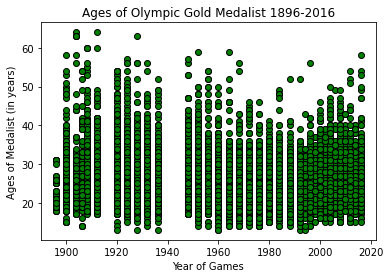

In [8]:
# Look at ages by type of medal
ages_gold_df = ages_winners_df[winners_df["Medal"] == "Gold"]
ages_silver_df = ages_winners_df[winners_df["Medal"] == "Silver"]
ages_bronze_df = ages_winners_df[winners_df["Medal"] == "Bronze"]

# Create scatter plot to look at ages of Gold medal winners over the years
plt.title("Ages of Olympic Gold Medalist 1896-2016")
plt.xlabel("Year of Games")
plt.ylabel("Ages of Medalist (in years)")
plt.scatter(ages_gold_df["Year"], ages_gold_df["Age"], marker ="o", facecolors="green", edgecolors="black")
plt.show()

In [9]:
ageMedals = ages_winners_df.groupby(["Age","Medal"]).size().unstack(fill_value=0).reset_index().rename_axis(None, axis=1)
ageTotal = ageMedals["Bronze"] + ageMedals["Silver"] + ageMedals["Gold"]
ageMedals["Total"] = ageTotal
ageSorted = ageMedals.sort_values(by="Total", ascending=False).reset_index()
ageTop = ageSorted.head(60)

ageBins = [0,19,29,39,80]
ageLabel = ['Under 20','20-30','30-40','40+']

ageSorted['Age Group'] = pd.cut(ageSorted['Age'],ageBins,labels=ageLabel)

groupedAge = ageSorted.groupby('Age Group').sum()

groupedAge.head()




,index,Age,Bronze,Gold,Silver,Total
Age Group,,,,,,
Under 20,45,145.0,1110,1163,1135,3408
20-30,145,245.0,9281,9312,8950,27543
30-40,245,345.0,2215,2337,2316,6868
40+,1395,1722.0,400,410,415,1225


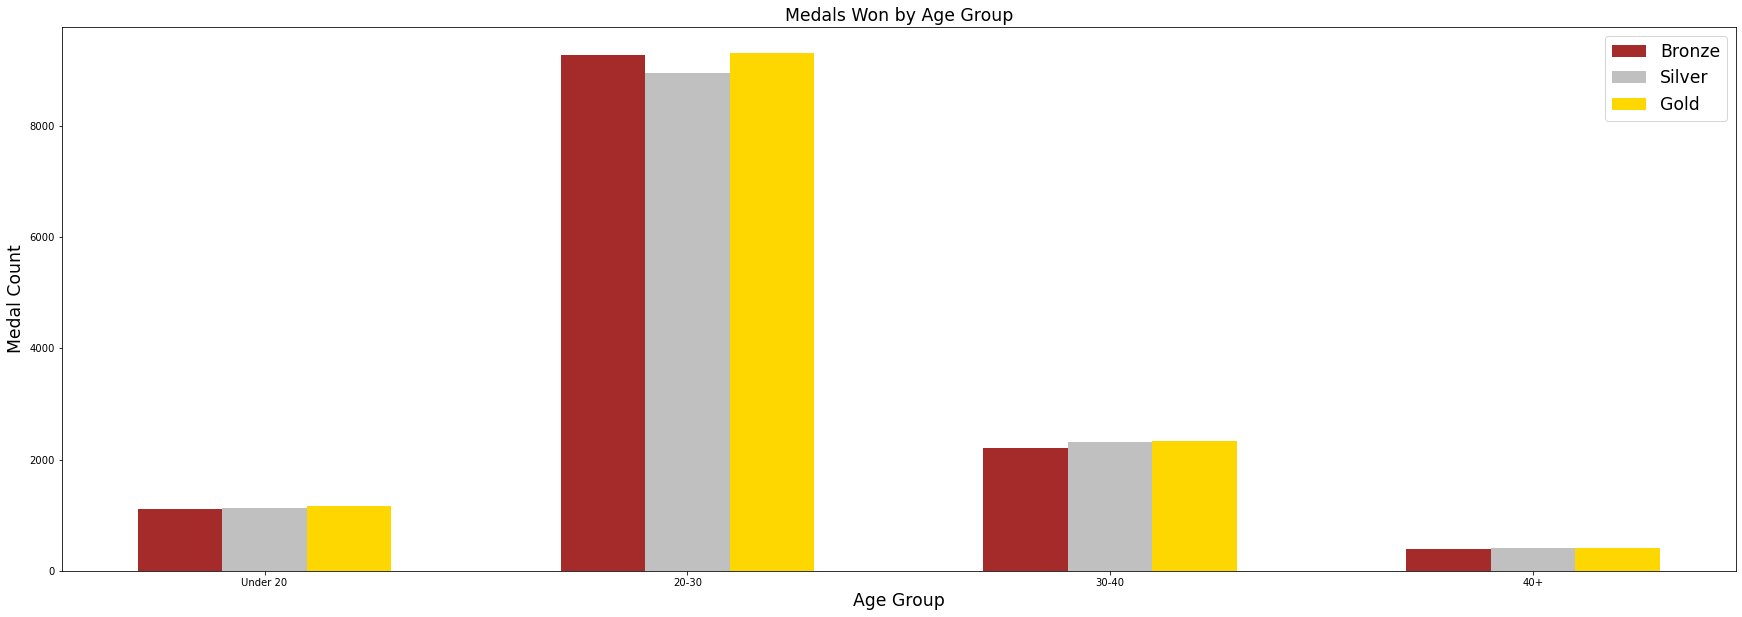

In [10]:
x_axis = np.arange(len(ageLabel))

plt.figure(figsize=(30,10))
plt.bar(x_axis -.2, groupedAge['Bronze'], 0.2, label = "Bronze", color="brown")
plt.bar(x_axis +.0, groupedAge["Silver"], 0.2, label = "Silver", color="silver")
plt.bar(x_axis +.2, groupedAge["Gold"], 0.2, label = "Gold", color="gold")
plt.xticks(x_axis,ageLabel)
plt.xlabel("Age Group", fontsize="xx-large")
plt.ylabel("Medal Count", fontsize="xx-large")
plt.title("Medals Won by Age Group", fontsize="xx-large")
plt.legend(loc="upper right",fontsize="xx-large")
plt.savefig('Images/medalsBy_ageGroup.png')
plt.show()

In [11]:
# Create dataframes for winners by olympic season
summer_winners = winners_df.loc[winners_df["Season"] == "Summer"]
# summer_winners.head()

winter_winners = winners_df.loc[winners_df["Season"] == "Winter"]
# winter_winners.head()

In [12]:
# Create summer winners dataframe grouped by country and medal
summer_medals = summer_winners.groupby(["Country","Medal"]).size().unstack(fill_value=0).rename_axis(None, axis=1)

# Sum medals for each country and create new total column
total_summer = summer_medals["Bronze"] + summer_medals["Silver"] + summer_medals["Gold"]
summer_medals["Total"] = total_summer

# Sort by total medals descending order and look at top 10 countries
summer_sorted = summer_medals.sort_values(by="Total", ascending=False).reset_index()
top_summer = summer_sorted.head(10)
top_summer



,Country,Bronze,Gold,Silver,Total
0,USA,1197,2472,1333,5002
1,Russia,994,1220,974,3188
2,Germany,1064,1075,987,3126
3,UK,620,635,729,1984
4,France,587,463,567,1617
5,Italy,454,518,474,1446
6,Australia,515,362,456,1333
7,Hungary,363,432,328,1123
8,Sweden,358,354,396,1108
9,Netherlands,371,245,302,918


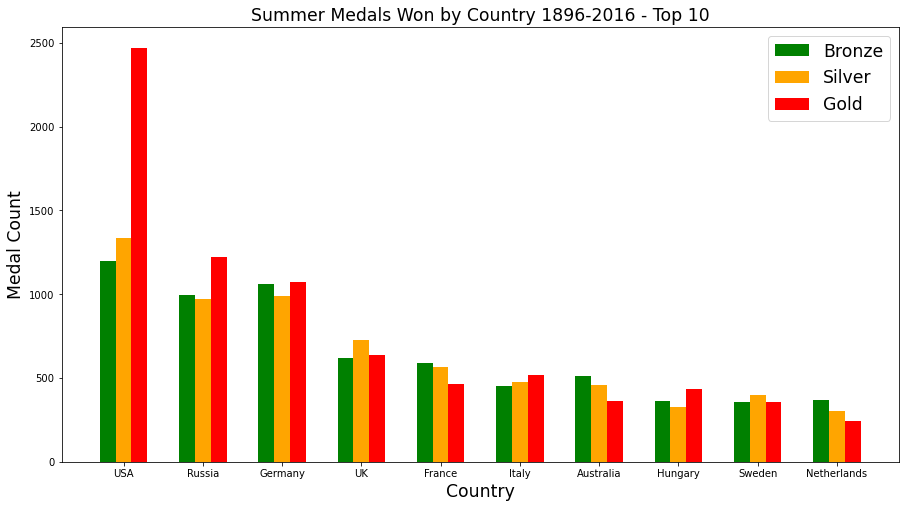

In [13]:
# Create bar chart for top summer medal winners
x_axis = np.arange(len(top_summer["Country"]))

plt.figure(figsize=(15,8))
plt.bar(x_axis -.2, top_summer["Bronze"], 0.2, label = "Bronze", color="green")
plt.bar(x_axis +.0, top_summer["Silver"], 0.2, label = "Silver", color="orange")
plt.bar(x_axis +.2, top_summer["Gold"], 0.2, label = "Gold", color="red")
plt.xticks(x_axis,top_summer["Country"])
plt.xlabel("Country", fontsize="xx-large")
plt.ylabel("Medal Count", fontsize="xx-large")
plt.title("Summer Medals Won by Country 1896-2016 - Top 10", fontsize="xx-large")
plt.legend(loc="upper right",fontsize="xx-large")
plt.savefig("Images/summer_medals_by_country")
plt.show()
plt.close()

In [14]:
# Create winter winners dataframe grouped by country and medal
winter_medals = winter_winners.groupby(["Country","Medal"]).size().unstack(fill_value=0).rename_axis(None, axis=1)
total_winter = winter_medals["Bronze"] + winter_medals["Silver"] + winter_medals["Gold"]
winter_medals["Total"] = total_winter
winter_sorted = winter_medals.sort_values(by="Total", ascending=False).reset_index()
top_winter = winter_sorted.head(10)
top_winter

,Country,Bronze,Gold,Silver,Total
0,Russia,184,379,196,759
1,USA,161,166,308,635
2,Germany,196,226,208,630
3,Canada,107,305,199,611
4,Norway,127,151,165,443
5,Sweden,177,125,126,428
6,Finland,215,66,145,426
7,Austria,103,79,98,280
8,Switzerland,129,76,70,275
9,Czech Republic,109,29,93,231


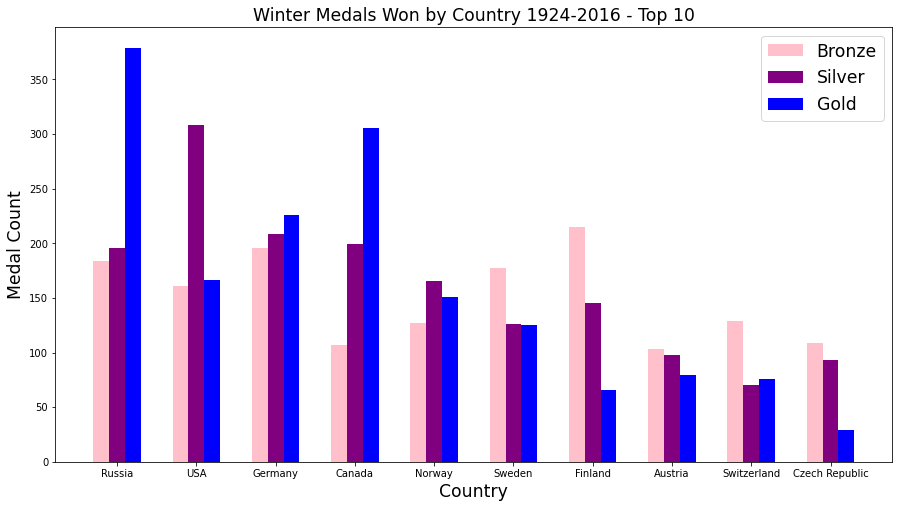

In [15]:
# Create bar chart for top winter medal winners
x_axis = np.arange(len(top_winter["Country"]))

plt.figure(figsize=(15,8))
plt.bar(x_axis -.2, top_winter["Bronze"], 0.2, label = "Bronze", color="pink")
plt.bar(x_axis +.0, top_winter["Silver"], 0.2, label = "Silver", color="purple")
plt.bar(x_axis +.2, top_winter["Gold"], 0.2, label = "Gold", color="blue")
plt.xticks(x_axis,top_winter["Country"])
plt.xlabel("Country", fontsize="xx-large")
plt.ylabel("Medal Count", fontsize="xx-large")
plt.title("Winter Medals Won by Country 1924-2016 - Top 10", fontsize="xx-large")
plt.legend(loc="upper right",fontsize="xx-large")
plt.savefig("Images/winter_medals_by_country")
plt.show()

In [16]:
summerGames_df = data[data['Season']=='Summer']
winterGames_df = data[data['Season']== 'Winter']
summerGames_df.head()

,ID,Name,Sex,Age,Height,Weight,Year,Season,Sport,Event,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,1992,Summer,Basketball,Basketball Men's Basketball,None,China
1,2,A Lamusi,M,23.0,170.0,60.0,2012,Summer,Judo,Judo Men's Extra-Lightweight,None,China
2,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,1920,Summer,Football,Football Men's Football,None,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,0.0,1932,Summer,Athletics,Athletics Women's 100 metres,None,Netherlands


In [17]:
summerGames_df.describe()

,ID,Age,Height,Weight,Year
count,221154.000000,221154.000000,221154.000000,221154.000000,221154.000000
mean,68015.654924,24.506624,135.447308,53.909760,1976.606989
std,39144.449105,8.077373,74.290632,32.736798,30.816164
min,1.000000,0.000000,0.000000,0.000000,1896.000000
25%,34010.250000,21.000000,155.000000,44.000000,1960.000000
50%,68341.000000,24.000000,171.000000,64.000000,1984.000000
75%,101904.000000,28.000000,180.000000,75.000000,2000.000000
max,135568.000000,97.000000,226.000000,214.000000,2016.000000


In [18]:
winterGames_df.describe()

,ID,Age,Height,Weight,Year
count,48564.00000,48564.000000,48564.000000,48564.000000,48564.000000
mean,69394.74930,24.892204,144.700848,57.615394,1987.825097
std,38462.33521,5.133285,66.229622,29.643903,22.070100
min,5.00000,0.000000,0.000000,0.000000,1924.000000
25%,37280.00000,22.000000,163.000000,54.000000,1972.000000
50%,67798.00000,24.000000,172.000000,66.000000,1994.000000
75%,103279.00000,28.000000,180.000000,76.000000,2006.000000
max,135571.00000,58.000000,211.000000,145.000000,2014.000000


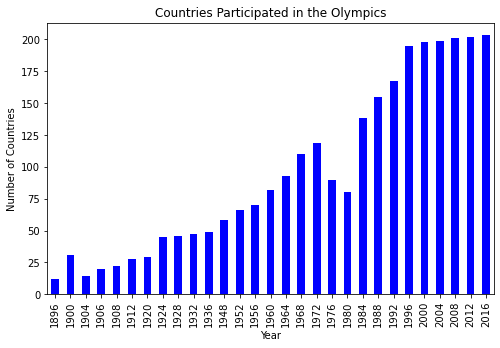

In [19]:
# Number of countries participated the Olympics (Many countries boycotted the 1980 olympics)
plt.figure(figsize=(8,5))
summerGames_df.groupby('Year')['Country'].nunique().plot(kind='bar',color='blue')
plt.xticks(rotation = 90)
plt.ylabel("Number of Countries")
plt.title("Countries Participated in the Olympics")
plt.savefig("Images/total_countries.png")
plt.show()

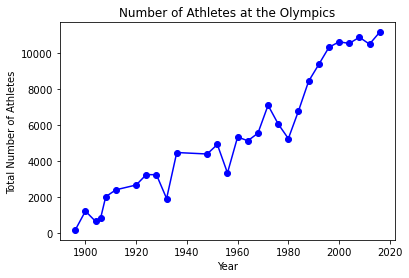

In [20]:
summerGames_df.groupby('Year')['ID'].nunique().plot(color='blue',marker='o')
plt.ylabel("Total Number of Athletes")
plt.title("Number of Athletes at the Olympics")
plt.savefig("Images/total_athletes.png")
plt.show()

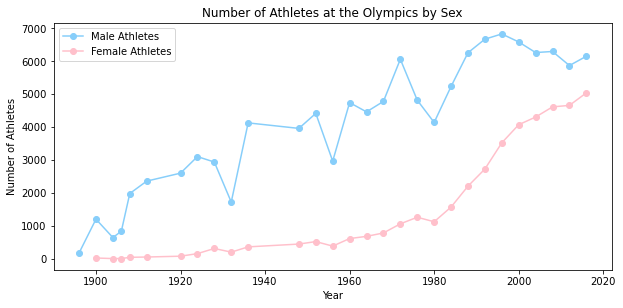

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
summerGames_df.loc[summerGames_df['Sex']=='M'].groupby('Year')['ID'].nunique().plot(color='lightskyblue',marker='o',label='Male Athletes')
summerGames_df.loc[summerGames_df['Sex']=='F'].groupby('Year')['ID'].nunique().plot(color='pink',marker='o',label='Female Athletes')
plt.ylabel("Number of Athletes")
plt.legend(loc='upper left')
plt.title("Number of Athletes at the Olympics by Sex")
plt.savefig("Images/athletes_by_sex.png")
plt.show()

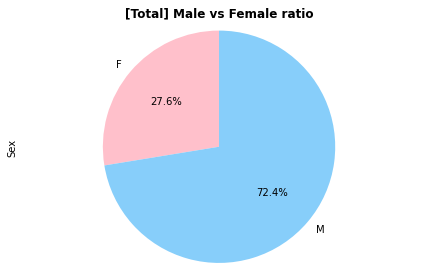

In [22]:
# Generate a pie plot showing the population of female versus male
sex = data.groupby("Sex")["Sex"].count()
colors = ["pink", "lightskyblue"]
sex_data = sex.plot(kind="pie", colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis("equal")
sex_data.set_title(label= "[Total] Male vs Female ratio", fontweight = "bold")
plt.tight_layout()
sex_data.figure.savefig("Images/male_vs_female_total.png")
plt.show()
plt.close()

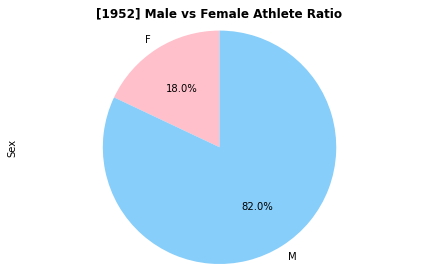

In [23]:
# Generate a pie plot showing male vs female population in early days (1952) 
old_data = data.loc[data["Year"]==1952]
sex = old_data.groupby("Sex")["Sex"].count()
colors = ["pink", "lightskyblue"]
sex_data = sex.plot(kind="pie", colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis("equal")
sex_data.set_title(label= "[1952] Male vs Female Athlete Ratio", fontweight = "bold")
plt.tight_layout()
sex_data.figure.savefig("Images/male_vs_female_1952.png")
plt.show()
plt.close()

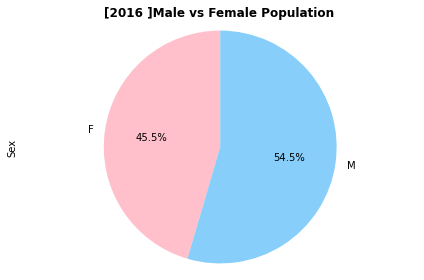

In [24]:
# Generate a pie plot showing male vs female population in recent years (2016)
new_data = data.loc[data["Year"]==2016]
sex = new_data.groupby("Sex")["Sex"].count()
colors = ["pink", "lightskyblue"]
sex_data = sex.plot(kind="pie", colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis("equal")
sex_data.set_title(label= "[2016 ]Male vs Female Population", fontweight = "bold")
plt.tight_layout()
sex_data.figure.savefig("Images/male_vs_female_2016.png")
plt.show()
plt.close()

In [25]:
# Group summer winners by year and create total medals column
yearly_summer = summer_winners.groupby(["Year","Country","Medal"]).size().unstack(fill_value=0).reset_index().rename_axis(None, axis=1)
total_summer = yearly_summer["Bronze"] + yearly_summer["Silver"] + yearly_summer["Gold"]
yearly_summer["Total Medals"] = total_summer
summer_total = yearly_summer[["Year", "Country","Total Medals"]]
summer_total



,Year,Country,Total Medals
0,1896,Australia,3
1,1896,Austria,5
2,1896,Denmark,6
3,1896,France,11
4,1896,Germany,32
...,...,...,...
1259,2016,Ukraine,15
1260,2016,United Arab Emirates,1
1261,2016,Uzbekistan,13
1262,2016,Venezuela,3


In [51]:
# Look at summer medal count for the US compared to the rest of the world
# pull out total medal count for USA and rest of the world and then combine back into new dataframe
usa_summer = summer_total.loc[summer_total["Country"] == "USA"].groupby(["Year"])["Total Medals"].sum().reset_index()
other_summer = summer_total.loc[summer_total["Country"] != "USA"].groupby(["Year"])["Total Medals"].sum().reset_index()
summer_medal_count = pd.merge(other_summer, usa_summer, how='left', on='Year')

# Preview merged results
summer_medal_count


,Year,Total Medals_x,Total Medals_y
0,1896,123,20.0
1,1900,530,63.0
2,1904,92,394.0
3,1906,434,24.0
4,1908,766,65.0
5,1912,834,107.0
6,1920,1114,194.0
7,1924,650,182.0
8,1928,646,88.0
9,1932,458,189.0


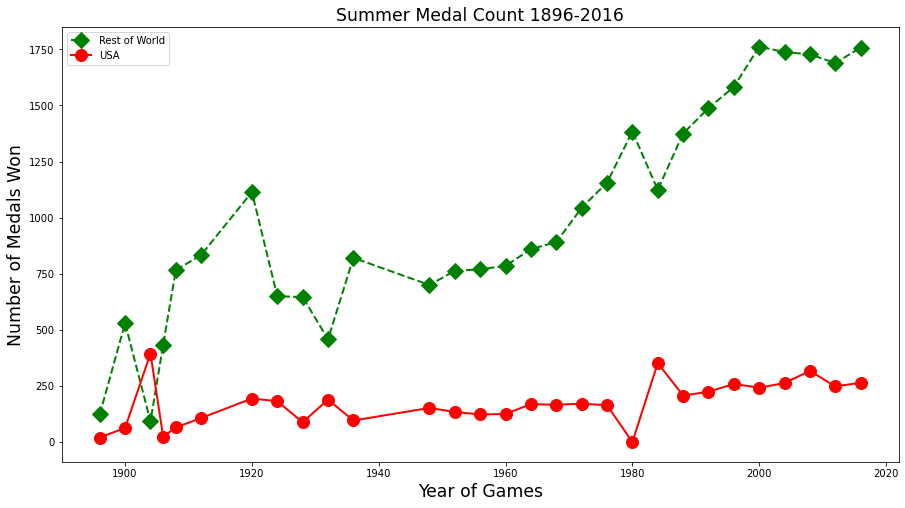

In [52]:
# Rename columns to reflect what is being shown and replace NaN with 0 for USA since there were no summer medals won for USA
summer_medal_count.rename(columns = {"Total Medals_x":"Rest of the World","Total Medals_y": "USA Medals"}, inplace = True)
summer_medal_count["USA Medals"].fillna(0, inplace = True)

# Plot multi-line graph
plt.figure(figsize=(15,8))
plt.plot(summer_medal_count["Year"], summer_medal_count["Rest of the World"], label="Rest of World", color="green", linewidth=2, linestyle="dashed",marker='D',markersize=12,markerfacecolor="g")
plt.plot(summer_medal_count["Year"], summer_medal_count["USA Medals"], label="USA", color="r", linewidth=2,marker='o',markersize=12,markerfacecolor="r")
plt.xlabel("Year of Games",fontsize="xx-large")
plt.ylabel("Number of Medals Won",fontsize="xx-large")
plt.legend(loc="best")
plt.title("Summer Medal Count 1896-2016",fontsize="xx-large")
plt.savefig("Images/summer_USA_vs_world_by_year.png")
plt.show()
plt.close()


In [53]:
# Repeat for winter
# Group winter winners by year and create total medals column
yearly_winter = winter_winners.groupby(["Year","Country","Medal"]).size().unstack(fill_value=0).reset_index().rename_axis(None, axis=1)
total_winter = yearly_winter["Bronze"] + yearly_winter["Silver"] + yearly_winter["Gold"]
yearly_winter["Total Medals"] = total_winter
winter_total = yearly_winter[["Year", "Country","Total Medals"]]
winter_total

,Year,Country,Total Medals
0,1924,Australia,1
1,1924,Austria,4
2,1924,Belgium,5
3,1924,Canada,9
4,1924,Finland,15
...,...,...,...
371,2014,Sweden,51
372,2014,Switzerland,30
373,2014,UK,10
374,2014,USA,64


In [54]:
# Look at winter medal count for the US compared to the rest of the world
# pull out total medal count for USA and rest of the world and then combine back into new dataframe
usa_winter = winter_total.loc[winter_total["Country"] == "USA"].groupby(["Year"])["Total Medals"].sum().reset_index()
other_winter = winter_total.loc[winter_total["Country"] != "USA"].groupby(["Year"])["Total Medals"].sum().reset_index()
winter_medal_count = pd.merge(other_winter, usa_winter, how='left', on='Year')

# Preview merged results
winter_medal_count

,Year,Total Medals_x,Total Medals_y
0,1924,118,12
1,1928,75,14
2,1932,58,34
3,1936,92,16
4,1948,119,16
5,1952,106,30
6,1956,124,26
7,1960,120,27
8,1964,178,8
9,1968,192,7


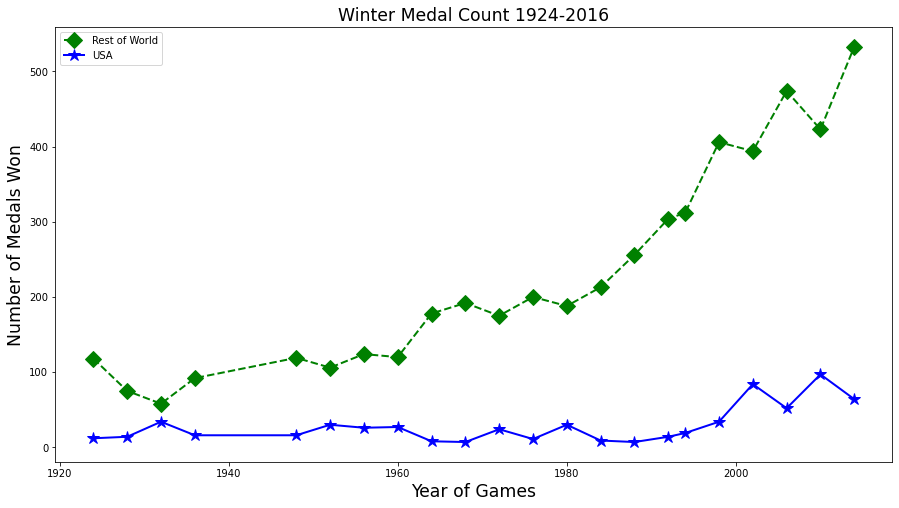

In [63]:
# Rename columns to reflect what is being shown and replace NaN with 0 for USA since there were no winter medals won for USA
winter_medal_count.rename(columns = {"Total Medals_x":"Rest of the World","Total Medals_y": "USA Medals"}, inplace = True)
# Plot multi-line graph
plt.figure(figsize=(15,8))
plt.plot(winter_medal_count["Year"], winter_medal_count["Rest of the World"], label="Rest of World", color="green", linewidth=2, linestyle="dashed",marker='D',markersize=12,markerfacecolor="g")
plt.plot(winter_medal_count["Year"], winter_medal_count["USA Medals"], label="USA", color="b", linewidth=2,marker='*',markersize=12,markerfacecolor="b")
plt.xlabel("Year of Games",fontsize="xx-large")
plt.ylabel("Number of Medals Won",fontsize="xx-large")
plt.legend(loc="best")
plt.title("Winter Medal Count 1924-2016",fontsize="xx-large")
plt.savefig("Images/winter_USA_vs_world_by_year.png")
plt.show()
plt.close()

In [56]:
# Look at # of events over the years for summer and winter
summer_data = data.loc[data["Season"] == "Summer"]
summer_events_df = summer_data.groupby("Year")["Event"].nunique().reset_index()

winter_data = data.loc[data["Season"] == "Winter"]
winter_events_df = winter_data.groupby("Year")["Event"].nunique().reset_index()

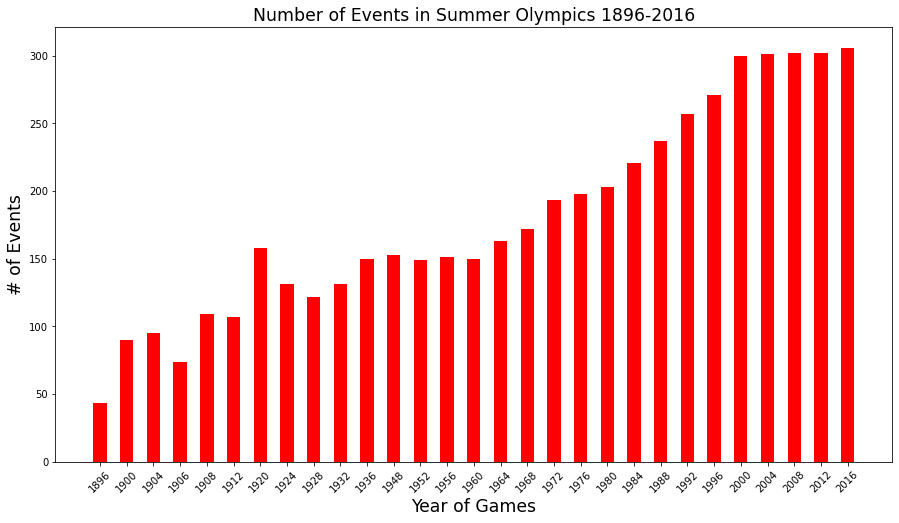

In [66]:
# Create bar chart for number of unique summer olympic events
x_axis = np.arange(len(summer_events_df["Year"]))

plt.figure(figsize=(15,8))
plt.bar(x_axis, summer_events_df["Event"], 0.5, label = "# of Events", color="red")
plt.xticks(x_axis,summer_events_df["Year"],rotation=45,)
plt.xlabel("Year of Games", fontsize="xx-large")
plt.ylabel("# of Events", fontsize="xx-large")
plt.title("Number of Events in Summer Olympics 1896-2016", fontsize="xx-large")
plt.savefig("Images/summer_events_by_year")
plt.show()
plt.close()

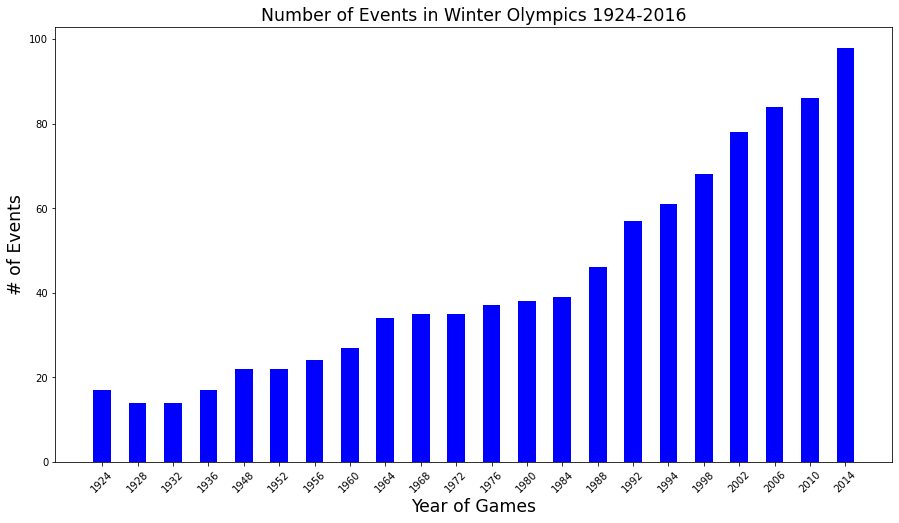

In [67]:
# Create bar chart for number of unique winter olympic events
x_axis = np.arange(len(winter_events_df["Year"]))

plt.figure(figsize=(15,8))
plt.bar(x_axis, winter_events_df["Event"], 0.5, label = "# of Events", color="blue")
plt.xticks(x_axis,winter_events_df["Year"],rotation=45,)
plt.xlabel("Year of Games", fontsize="xx-large")
plt.ylabel("# of Events", fontsize="xx-large")
plt.title("Number of Events in Winter Olympics 1924-2016", fontsize="xx-large")
plt.savefig("Images/winter_events_by_year")
plt.show()
plt.close()

In [59]:
# Look at # of sports over the years for summer and winter
summer_data = data.loc[data["Season"] == "Summer"]
summer_sports_df = summer_data.groupby("Year")["Sport"].nunique().reset_index()

winter_data = data.loc[data["Season"] == "Winter"]
winter_sports_df = winter_data.groupby("Year")["Sport"].nunique().reset_index()

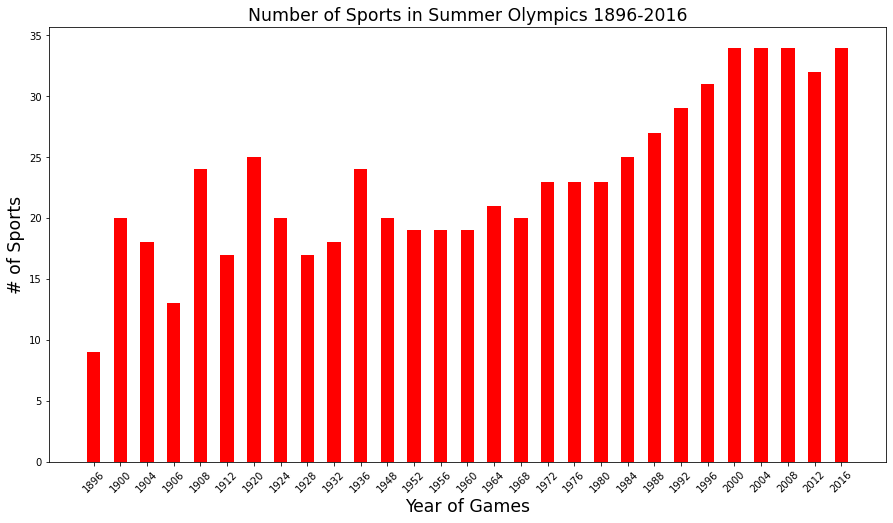

In [60]:
# Create bar chart for number of unique summer olympic sports
x_axis = np.arange(len(summer_events_df["Year"]))

plt.figure(figsize=(15,8))
plt.bar(x_axis, summer_sports_df["Sport"], 0.5, label = "# of Sports", color="red")
plt.xticks(x_axis,summer_sports_df["Year"],rotation=45,)
plt.xlabel("Year of Games", fontsize="xx-large")
plt.ylabel("# of Sports", fontsize="xx-large")
plt.title("Number of Sports in Summer Olympics 1896-2016", fontsize="xx-large")
# plt.savefig("Images/summer_medals_by_country")
plt.show()
# plt.close()

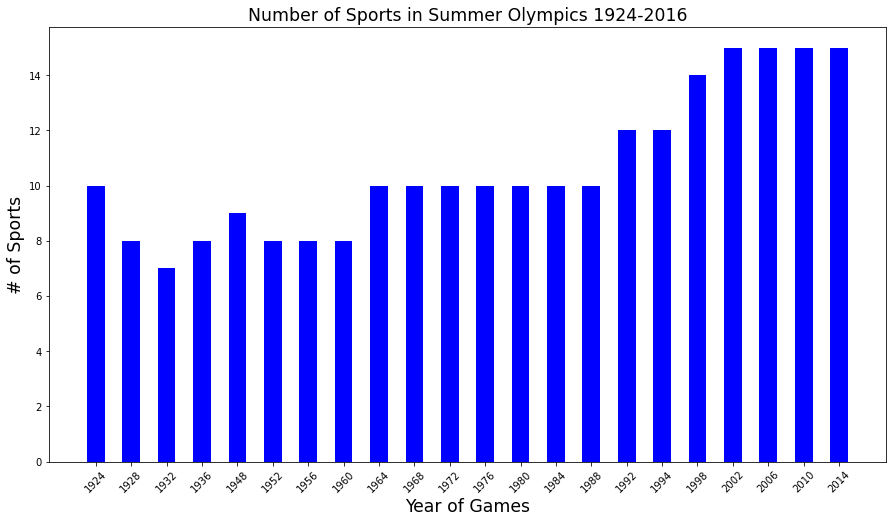

In [65]:
# Create bar chart for number of unique winter olympic sports
x_axis = np.arange(len(winter_sports_df["Year"]))

plt.figure(figsize=(15,8))
plt.bar(x_axis, winter_sports_df["Sport"], 0.5, label = "# of Sports", color="blue")
plt.xticks(x_axis,winter_sports_df["Year"],rotation=45,)
plt.xlabel("Year of Games", fontsize="xx-large")
plt.ylabel("# of Sports", fontsize="xx-large")
plt.title("Number of Sports in Summer Olympics 1924-2016", fontsize="xx-large")
# plt.savefig("Images/summer_medals_by_country")
plt.show()
# plt.close()